In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:

data = 'COORDENADAS EUROPEAS.xlsx'

dataset = pd.read_excel(data)

del dataset['cluster']



In [4]:
features = dataset.copy()
del features['Longitude']
del features['Latitude']
del features['NumerodeLinea']
del features['Dato']

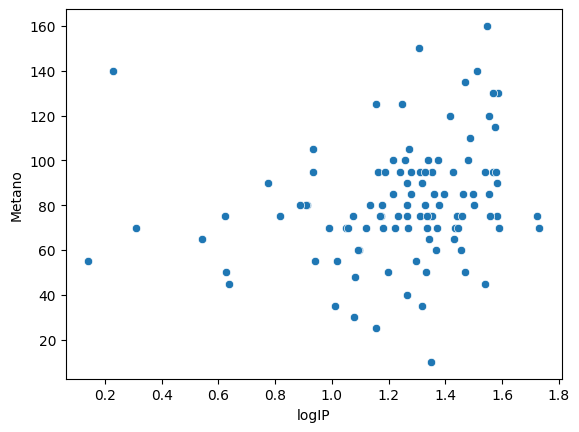

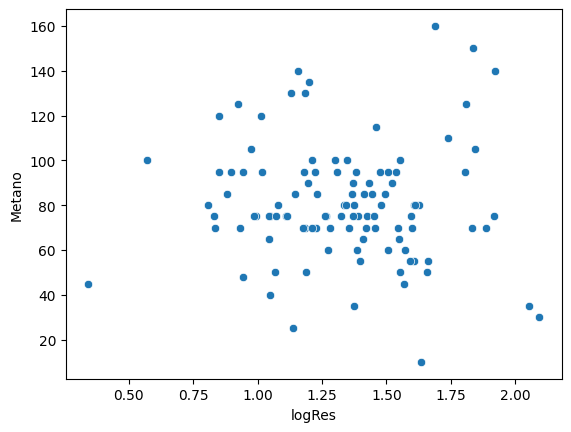

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión para la relación proporcional
sns.scatterplot(x='logIP', y='Metano', data=features)
plt.show()

# Gráfico de dispersión para la relación inversamente proporcional
sns.scatterplot(x='logRes', y='Metano', data=features)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

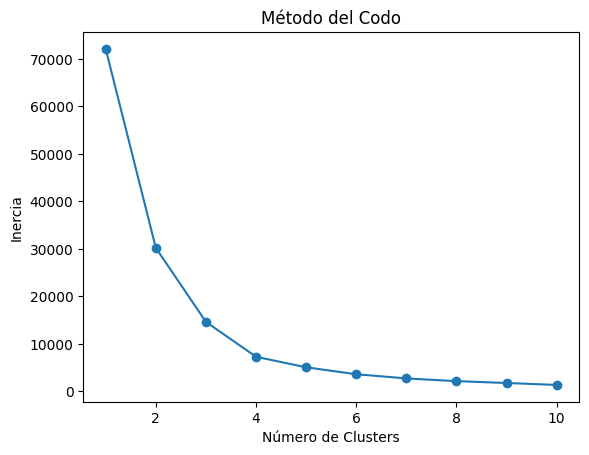

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Prueba con diferentes valores de clusters y calcula la inercia
inertias = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)

# Grafica la curva de codo
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


In [7]:
import pandas as pd
# Supongamos que el número óptimo de clusters es 3 (ajusta según tu análisis)
optimal_clusters = 5

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans_optimal.fit_predict(features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features, labels)
print("Coeficiente de Silueta:", silhouette_avg)


Coeficiente de Silueta: 0.6156548474971062


In [10]:
dataset['labels']=labels

In [11]:
# Calcula la matriz de correlación
correlation_matrix = features.corr()

# Muestra la matriz de correlación
print(correlation_matrix)


          logRes     logIP    Metano
logRes  1.000000 -0.141071 -0.040280
logIP  -0.141071  1.000000  0.205695
Metano -0.040280  0.205695  1.000000


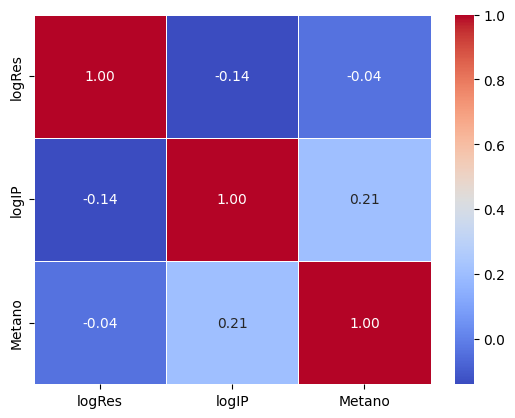

In [12]:


# Crea un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Muestra el mapa de calor
plt.show()


In [13]:
!pip install geopandas shapely matplotlib



In [17]:
from scipy.interpolate import griddata
import scipy as sp
import scipy.ndimage


In [18]:
x1 = np.asarray(dataset.Longitude.tolist())
y1 = np.asarray(dataset.Latitude.tolist())
z1 = np.asarray(dataset.logRes.tolist())

x2 = np.asarray(dataset.Longitude.tolist())
y2 = np.asarray(dataset.Latitude.tolist())
z2 = np.asarray(dataset.labels.tolist())


In [19]:
x_arr1          = np.linspace(np.min(x1), np.max(x1), 500)
y_arr1         = np.linspace(np.min(y1), np.max(y1), 500)
x_mesh1, y_mesh1 = np.meshgrid(x_arr1, y_arr1)

x_arr2          = np.linspace(np.min(x2), np.max(x2), 500)
y_arr2         = np.linspace(np.min(y2), np.max(y2), 500)
x_mesh2, y_mesh2 = np.meshgrid(x_arr2, y_arr2)

In [20]:
z_mesh1 = griddata((x1, y1), z1, (x_mesh1, y_mesh1), method='linear')
z_mesh2 = griddata((x2, y2), z2, (x_mesh2, y_mesh2), method='linear')


In [21]:
sigma = [5, 5]
z_mesh1 = sp.ndimage.filters.gaussian_filter(z_mesh1, sigma, mode='constant')
z_mesh2 = sp.ndimage.filters.gaussian_filter(z_mesh2, sigma, mode='constant')

<ipython-input-21-c51ea17f556d>:2: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  z_mesh1 = sp.ndimage.filters.gaussian_filter(z_mesh1, sigma, mode='constant')
<ipython-input-21-c51ea17f556d>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  z_mesh2 = sp.ndimage.filters.gaussian_filter(z_mesh2, sigma, mode='constant')


Text(0.5, 1.0, 'Mapa Pluma de Lixiviados')

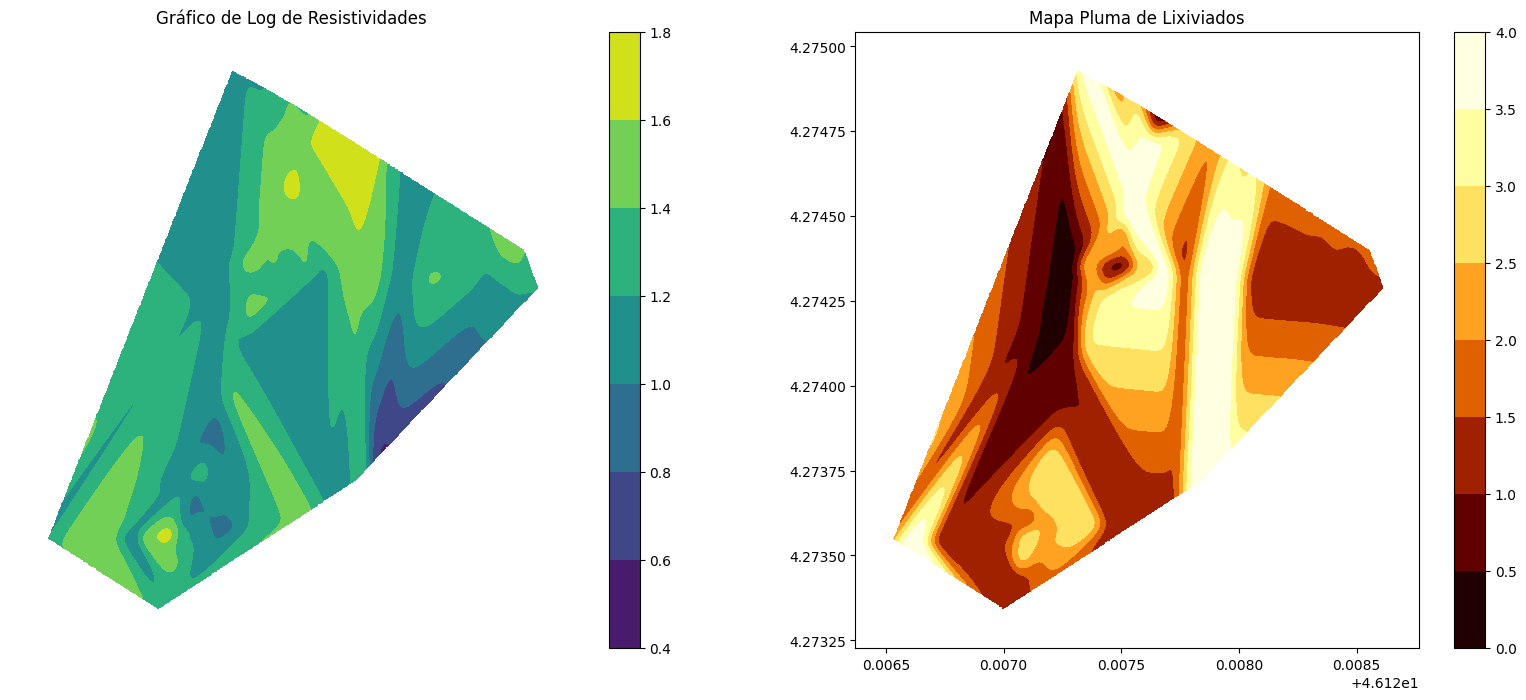

In [22]:
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
contourf = plt.contourf(x_mesh1, y_mesh1, z_mesh1,cmap='viridis')
plt.colorbar()
plt.title('Gráfico de Log de Resistividades', fontsize=12)
plt.axis('off')


plt.subplot(1, 2, 2)
contourf = plt.contourf(x_mesh2, y_mesh2, z_mesh2,cmap='afmhot')
plt.colorbar()
plt.title('Mapa Pluma de Lixiviados', fontsize=12)